/var/folders/9m/6b08zp213znc3k12g6gpjj9rqx2ly9/T/ipykernel_27079/2206451298.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20', len(final_condition_accuracy))


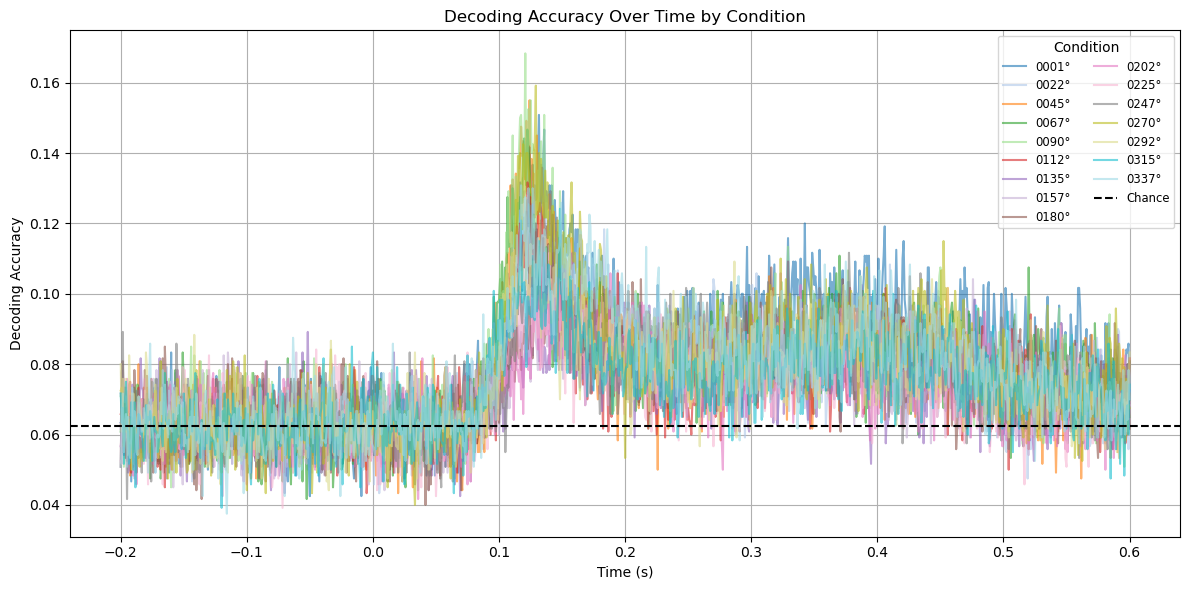

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np
import pandas as pd
top_dir = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data'
data_dir = os.path.join(top_dir, 'Anisotropy/Proportions')
times_dir = os.path.join(top_dir, 'times')
output_dir = os.path.join(top_dir, 'Anisotropy')
file_path = os.path.join(data_dir, 'MeanedIndividualConditionData.npy')
file_path_times = os.path.join(times_dir, 'TimesForPlots.npy')
final_condition_accuracy = np.load(file_path, allow_pickle=True).item()
times = np.load(file_path_times, allow_pickle=True)

plt.figure(figsize=(12, 6))
times = times
colormap = cm.get_cmap('tab20', len(final_condition_accuracy))

for idx, (cond, acc_curve) in enumerate(sorted(final_condition_accuracy.items(), key=lambda x: int(x[0]))):
    plt.plot(times, acc_curve, label=f"{cond}°", color=colormap(idx), alpha=0.6, linewidth=1.5)


plt.xlabel('Time (s)')
plt.ylabel('Decoding Accuracy')
plt.title('Decoding Accuracy Over Time by Condition')
plt.axhline(1.0 / len(final_condition_accuracy), color='k', linestyle='--', label='Chance')
plt.legend(loc='upper right', fontsize='small', title='Condition', ncol=2)
plt.grid(True)
plt.tight_layout()

# Save figure
plot_path = os.path.join(output_dir, "decoding_accuracy_by_condition_smoothed.png")
#plt.savefig(plot_path, dpi=300)
plt.show()



In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os

def circular_accuracy_plot(final_condition_accuracy, times, timepoint, output_dir, peak_label=""):
    time_idx = np.argmin(np.abs(times - timepoint))
    print(time_idx)
    sorted_conditions = sorted(final_condition_accuracy.items(), key=lambda x: int(x[0]))
    degrees = [int(cond) for cond, _ in sorted_conditions]
    angles = np.deg2rad(degrees)

    values = np.array([acc_curve[time_idx] for _, acc_curve in sorted_conditions])

    max_val = values.max()
    scale_max = max_val * 1.1  # 10% larger than max accuracy

    # Scale values so min maps to 0, max maps slightly beyond max observed accuracy
    scaled_values = values / scale_max
    scaled_values = np.clip(scaled_values, 0, 1)

    # Close the circle
    angles = np.append(angles, angles[0])
    scaled_values = np.append(scaled_values, scaled_values[0])

    fig = plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)

    # Rotate plot so the angle corresponding to '1' is at the top (π/2 radians)
    # Find the angle of condition '1'
    angle_1 = np.deg2rad(1)  # assuming condition label '1' corresponds to 1 degree
    ax.set_theta_offset(np.pi/2 - angle_1)

    # Plot line with markers only (no fill)
    ax.plot(angles, scaled_values, marker='o', linestyle='-', color='blue', linewidth=2)

    # Remove grid lines
    ax.grid(False)

    # Set angle ticks and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f"{d}°" for d in degrees])

    # Set radius limits and ticks, but no legend
    ax.set_ylim(0, 1)
    ax.set_yticks([])  # Hide radial ticks (accuracy scale)
    ax.plot(angles, scaled_values, marker='o', linestyle='-', color='blue', linewidth=2)

        # Add radial ticks with real accuracy labels
    ax.set_ylim(0, 1)
    radial_ticks = np.linspace(0, 1, 5)
    ax.set_yticks(radial_ticks)
    ax.set_yticklabels([f"{v * scale_max:.2f}" for v in radial_ticks], fontsize=8)

    ax.set_title(f'Decoding Accuracy at {peak_label} (t={timepoint:.3f}s)', va='bottom')

    plt.tight_layout()

    fig_path = os.path.join(output_dir, f'circular_accuracy_{peak_label.replace(" ", "_")}_t{timepoint:.3f}.png')
    #plt.savefig(fig_path, dpi=300)
    plt.show()


In [45]:
peaks_csv = '/System/Volumes/Data/misc/data12/sjapee/Sebastian-OrientationImagery/!Important Data/LDA-16way Static/Peak_Times.csv'
peaks_df = pd.read_csv(peaks_csv)
peak_time_early = peaks_df['peak1_time_ms'].values[-1] / 1000
peak_time_late= peaks_df['peak2_time_ms'].values[-1] / 1000
print(peak_time_early)

0.124


389


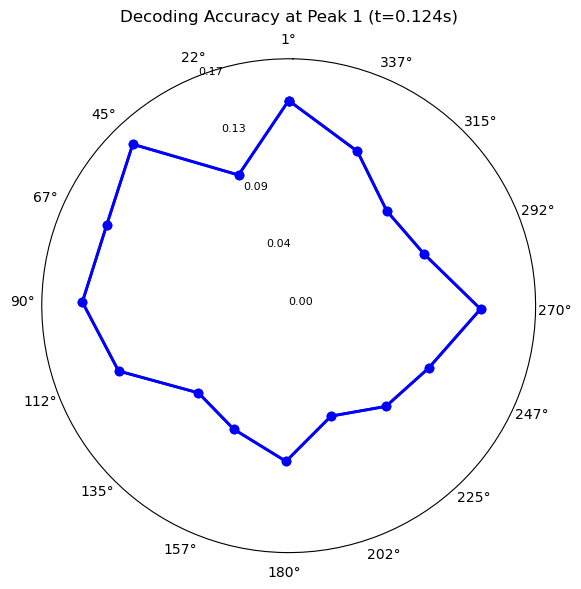

635


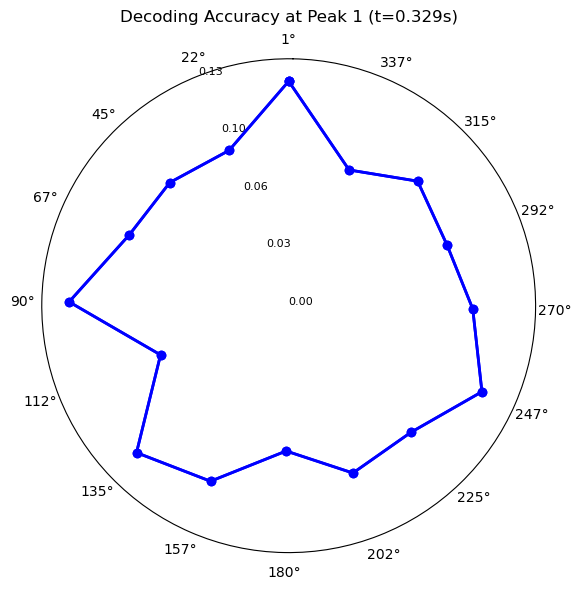

In [46]:
circular_accuracy_plot(final_condition_accuracy, times, timepoint=peak_time_early, output_dir=output_dir, peak_label="Peak 1")
circular_accuracy_plot(final_condition_accuracy, times, timepoint=peak_time_late, output_dir=output_dir, peak_label="Peak 1")

